In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

In [2]:
T_C = np.linspace(50,1500,1000)
T_K = T_C + 273.15

Text(0.5, 1.0, 'Graph 1: Kp of Reaction 1')

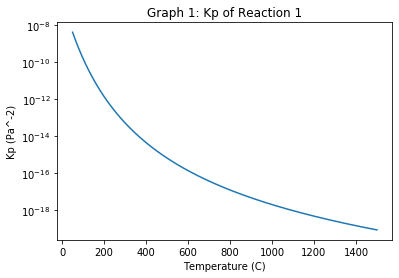

In [3]:
def reaction1_Kp(T_K) :
    qCH3OH = 4.27*10**26 * T_K**(3) * (1/(1-np.exp(-2375/T_K)))
    qH2O = 4.27*10**26 * T_K**(3) * (1/(1-np.exp(-2375/T_K)))
    qH2 = 9.8*10**23 * T_K**(5/2) * (1/(1-np.exp(-6339/T_K)))
    qCO2 = 1.55*10**28 * T_K**(5/2) * (1/(1-np.exp(-3451/T_K)))
    eTerm = np.exp(5857.6/T_K)
    kTTerm = 5.251*10**45 * T_K**(-2)
    Kp = (qCH3OH * qH2O)/(qCO2 * qH2**3) * eTerm * kTTerm
    
    return Kp

Kp1_x = reaction1_Kp(T_K)
plt.yscale("log")
plt.plot(T_C,Kp1_x)
plt.xlabel('Temperature (C)')
plt.ylabel('Kp (Pa^-2)')
plt.title('Graph 1: Kp of Reaction 1')

Text(0.5, 1.0, 'Graph 2: Vant Hoff Graph of Reaction 1')

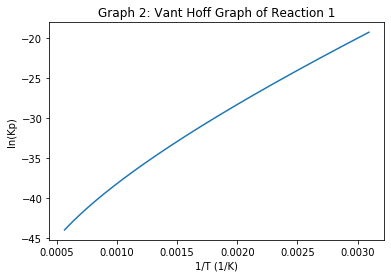

In [4]:
VantHoff1_y = np.log(reaction1_Kp(T_K))
VantHoff1_x = 1/T_K
plt.plot(VantHoff1_x,VantHoff1_y)
plt.xlabel('1/T (1/K)')
plt.ylabel('ln(Kp)')
plt.title('Graph 2: Vant Hoff Graph of Reaction 1')

Text(0.5, 1.0, 'Graph 3: Kp of Reaction 2')

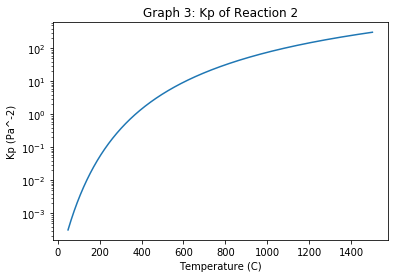

In [5]:
def reaction2_Kp(T_K) :
    qCO = 3.190*10**27 * T_K**(5/2) * (1/(1-np.exp(-3126/T_K)))
    qH2O = 4.27*10**26 * T_K**(3) * (1/(1-np.exp(-2375/T_K)))
    qH2 = 9.8*10**23 * T_K**(5/2) * (1/(1-np.exp(-6339/T_K)))
    qCO2 = 1.55*10**28 * T_K**(5/2) * (1/(1-np.exp(-3451/T_K)))
    eTerm = np.exp(-4991.6/T_K)
    Kp = (qCO * qH2O)/(qCO2 * qH2) * eTerm
    
    return Kp

Kp2_y = reaction2_Kp(T_K)
plt.plot(T_C,Kp2_y)
plt.yscale("log")
plt.xlabel('Temperature (C)')
plt.ylabel('Kp (Pa^-2)')
plt.title('Graph 3: Kp of Reaction 2')

Text(0.5, 1.0, 'Graph 4: Vant Hoff Graph of Reaction 2')

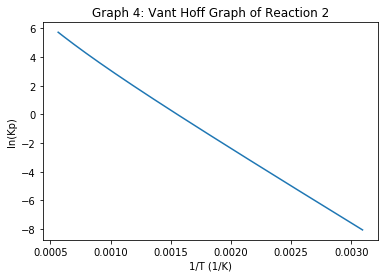

In [6]:
VantHoff2_y = np.log(reaction2_Kp(T_K))
VantHoff2_x = 1/T_K
plt.plot(VantHoff2_x,VantHoff2_y)
plt.xlabel('1/T (1/K)')
plt.ylabel('ln(Kp)')
plt.title('Graph 4: Vant Hoff Graph of Reaction 2')

Text(0.5, 1.0, 'Graph 5: Enthalpy Graph of Reaction 2')

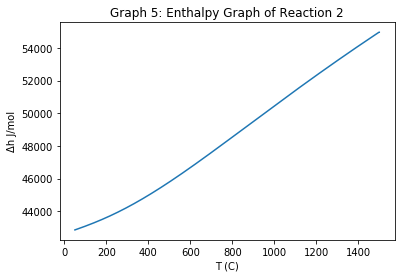

In [7]:
def enthalpy2(T_K):
    h = np.zeros(len(T_K))
    for i in range(0,len(T_K)-1):
        a = np.log(reaction2_Kp(T_K[i]))
        b = np.log(reaction2_Kp(T_K[i+1]))
        c = 1/T_K[i]
        d = 1/T_K[i+1]
        h[i] = -8.314 * (b-a)/(d-c)
    h[len(T_K)-1] = h[len(T_K)-2]
    
    return h

enthalpy2_y = enthalpy2(T_K)
enthalpy2_x = T_C
plt.plot(enthalpy2_x,enthalpy2_y)
plt.xlabel('T (C)')
plt.ylabel('\u0394h J/mol')
plt.title('Graph 5: Enthalpy Graph of Reaction 2')

Text(0.5, 1.0, 'Graph 6: Chemical Potential Graph of Reaction 2')

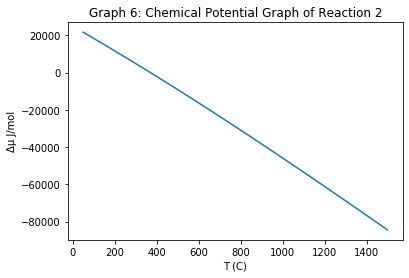

In [8]:
def potential2(T_K):
    potential = -8.314*T_K*np.log(reaction2_Kp(T_K))
    
    return potential

potential2_y = potential2(T_K)
potential2_x = T_C
plt.plot(potential2_x,potential2_y)
plt.xlabel('T (C)')
plt.ylabel('\u0394\u03BC J/mol')
plt.title('Graph 6: Chemical Potential Graph of Reaction 2')

Text(0.5, 1.0, 'Graph 7: Entropy Graph of Reaction 2')

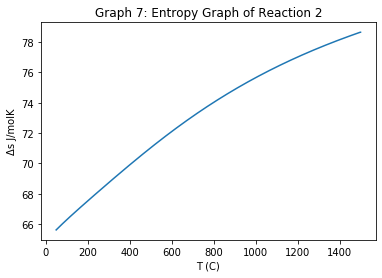

In [9]:
def entropy2(T_K):
    entropy = (enthalpy2(T_K) - potential2(T_K))/T_K
    
    return entropy

entropy2_y = entropy2(T_K)
entropy2_x = T_C
plt.plot(entropy2_x,entropy2_y)
plt.xlabel('T (C)')
plt.ylabel('\u0394s J/molK')
plt.title('Graph 7: Entropy Graph of Reaction 2')

Text(0.5, 1.0, 'Graph 8: Kp and reverse Kp of Reaction 2')

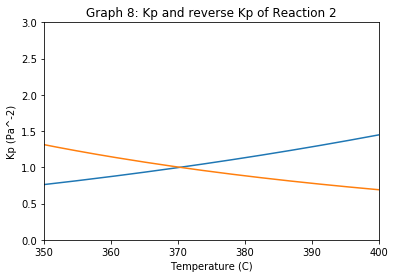

In [10]:
def reaction2_reverseKp(T_K) :
    qCO = 3.190*10**27 * T_K**(5/2) * (1/(1-np.exp(-3126/T_K)))
    qH2O = 4.27*10**26 * T_K**(3) * (1/(1-np.exp(-2375/T_K)))
    qH2 = 9.8*10**23 * T_K**(5/2) * (1/(1-np.exp(-6339/T_K)))
    qCO2 = 1.55*10**28 * T_K**(5/2) * (1/(1-np.exp(-3451/T_K)))
    eTerm = np.exp(4991.6/T_K)
    Kp = (qCO2 * qH2)/(qCO * qH2O) * eTerm
    
    return Kp
Kp2_y = reaction2_Kp(T_K)
Kp2_y2 = reaction2_reverseKp(T_K)
plt.plot(T_C,Kp2_y)
plt.plot(T_C,Kp2_y2)
axes = plt.gca()
axes.set_ylim([0,3])
axes.set_xlim([350,400])
plt.xlabel('Temperature (C)')
plt.ylabel('Kp (Pa^-2)')
plt.title('Graph 8: Kp and reverse Kp of Reaction 2')

Text(0.5, 1.0, "Graph 9: Kp1'(T,P)")

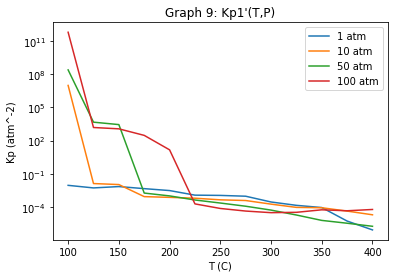

In [11]:
T2_C = np.linspace(100,400,13)
conv1 = np.array([0.1,0.08,0.09,0.075,0.063,0.041,0.04,0.037,0.021,0.015,0.012,0.003,0.0012])
conv10 = np.array([0.995,0.45,0.432,0.228,0.217,0.205,0.183,0.174,0.132,0.101,0.098,0.073,0.052])
conv50 = np.array([0.999,0.985,0.983,0.553,0.505,0.433,0.379,0.323,0.259,0.187,0.124,0.098,0.075])
conv100 = np.array([0.9999,0.986,0.985,0.979,0.956,0.482,0.401,0.355,0.327,0.333,0.377,0.360,0.383])
def Kp_partialP(conv,P0):
    nCO2 = (1- conv)
    nH2 = (3*nCO2)
    nCH3OH = (conv)
    nH2O = (conv)
    P = P0*((nCO2+nH2+nCH3OH+nH2O)/4)
    PCO2 = P * (nCO2/(nCO2 + nH2 + nCH3OH + nH2O))
    PH2 = P * (nH2/(nCO2 + nH2 + nCH3OH + nH2O))
    PCH3OH = P * (nCH3OH/(nCO2 + nH2 + nCH3OH + nH2O))
    PH2O = P * (nH2O/(nCO2 + nH2 + nCH3OH + nH2O))
    Kp = (PCH3OH*PH2O)/(PCO2*PH2**3)
    return Kp

Kp1 = Kp_partialP(conv1,1)
Kp10 = Kp_partialP(conv10,10)
Kp50 = Kp_partialP(conv50,50)
Kp100 = Kp_partialP(conv100,100)
plt.plot(T2_C,Kp1)
plt.plot(T2_C,Kp10)
plt.plot(T2_C,Kp50)
plt.plot(T2_C,Kp100)
plt.yscale("log")
plt.legend(["1 atm", "10 atm", "50 atm", "100 atm"])
plt.xlabel('T (C)')
plt.ylabel('Kp (atm^-2)')
plt.title('Graph 9: Kp1\'(T,P)')

In [12]:
V = 1
aCO2 = 3.64/1.01
bCO2 = 0.04267
aH2 = 0.2467/1.01
bH2 = 0.02661
aCH3OH = 9.649/1.01
bCH3OH = 0.06702
aH2O = 5.536/1.01
bH2O = 0.03049

def f_NCO2(x,i):
    ZERO = (PCO2[i] + aCO2*(x/V)**2)*(V/x - bCO2) - 0.08206*(T2_C[i] + 273.15)
    return ZERO
def f_NH2(x,i):
    ZERO = (PH2[i] + aH2*(x/V)**2)*(V/x - bH2) - 0.08206*(T2_C[i] + 273.15)
    return ZERO
def f_NCH3OH(x,i):
    ZERO = (PCH3OH[i] + aCH3OH*(x/V)**2)*(V/x - bCH3OH) - 0.08206*(T2_C[i] + 273.15)
    return ZERO
def f_NH2O(x,i):
    ZERO = (PH2O[i] + aH2O*(x/V)**2)*(V/x - bH2O) - 0.08206*(T2_C[i] + 273.15)
    return ZERO

In [13]:
# 1 atm
nCO2 = (1 - conv1)
nH2 = (3*nCO2)
nCH3OH = (conv1)
nH2O = (conv1)

P_atm = 1
P = P_atm*((nCO2+nH2+nCH3OH+nH2O)/4)
PCO2 = P * (nCO2/(nCO2 + nH2 + nCH3OH + nH2O))
PH2 = P * (nH2/(nCO2 + nH2 + nCH3OH + nH2O))
PCH3OH = P * (nCH3OH/(nCO2 + nH2 + nCH3OH + nH2O))
PH2O = P * (nH2O/(nCO2 + nH2 + nCH3OH + nH2O))

NCO2_1 = np.zeros(13)
NH2_1 = np.zeros(13)
NCH3OH_1 = np.zeros(13)
NH2O_1 = np.zeros(13)
for i in range(0,13):
    NCO2_1[i] = fsolve(func=f_NCO2, x0=0.00001, args=i)
    NH2_1[i] = fsolve(func=f_NH2, x0=0.00001, args=i)
    NCH3OH_1[i] = fsolve(func=f_NCH3OH, x0=0.00001, args=i)
    NH2O_1[i] = fsolve(func=f_NH2O, x0=0.00001, args=i)

In [14]:
# 10 atm
nCO2 = (1 - conv10)
nH2 = (3*nCO2)
nCH3OH = (conv10)
nH2O = (conv10)

P_atm = 10
P = P_atm*((nCO2+nH2+nCH3OH+nH2O)/4)
PCO2 = P * (nCO2/(nCO2 + nH2 + nCH3OH + nH2O))
PH2 = P * (nH2/(nCO2 + nH2 + nCH3OH + nH2O))
PCH3OH = P * (nCH3OH/(nCO2 + nH2 + nCH3OH + nH2O))
PH2O = P * (nH2O/(nCO2 + nH2 + nCH3OH + nH2O))

NCO2_10 = np.zeros(13)
NH2_10 = np.zeros(13)
NCH3OH_10 = np.zeros(13)
NH2O_10 = np.zeros(13)
for i in range(0,13):
    NCO2_10[i] = fsolve(func=f_NCO2, x0=0.00001, args=i)
    NH2_10[i] = fsolve(func=f_NH2, x0=0.00001, args=i)
    NCH3OH_10[i] = fsolve(func=f_NCH3OH, x0=0.00001, args=i)
    NH2O_10[i] = fsolve(func=f_NH2O, x0=0.00001, args=i)

In [15]:
# 50 atm
nCO2 = (1 - conv50)
nH2 = (3*nCO2)
nCH3OH = (conv50)
nH2O = (conv50)

P_atm = 50
P = P_atm*((nCO2+nH2+nCH3OH+nH2O)/4)
PCO2 = P * (nCO2/(nCO2 + nH2 + nCH3OH + nH2O))
PH2 = P * (nH2/(nCO2 + nH2 + nCH3OH + nH2O))
PCH3OH = P * (nCH3OH/(nCO2 + nH2 + nCH3OH + nH2O))
PH2O = P * (nH2O/(nCO2 + nH2 + nCH3OH + nH2O))

NCO2_50 = np.zeros(13)
NH2_50 = np.zeros(13)
NCH3OH_50 = np.zeros(13)
NH2O_50 = np.zeros(13)
for i in range(0,13):
    NCO2_50[i] = fsolve(func=f_NCO2, x0=0.00001, args=i)
    NH2_50[i] = fsolve(func=f_NH2, x0=0.00001, args=i)
    NCH3OH_50[i] = fsolve(func=f_NCH3OH, x0=0.00001, args=i)
    NH2O_50[i] = fsolve(func=f_NH2O, x0=0.00001, args=i)

In [16]:
# 100 atm
nCO2 = (1 - conv100)
nH2 = (3*nCO2)
nCH3OH = (conv100)
nH2O = (conv100)

P_atm = 100
P = P_atm*((nCO2+nH2+nCH3OH+nH2O)/4)
PCO2 = P * (nCO2/(nCO2 + nH2 + nCH3OH + nH2O))
PH2 = P * (nH2/(nCO2 + nH2 + nCH3OH + nH2O))
PCH3OH = P * (nCH3OH/(nCO2 + nH2 + nCH3OH + nH2O))
PH2O = P * (nH2O/(nCO2 + nH2 + nCH3OH + nH2O))

NCO2_100 = np.zeros(13)
NH2_100 = np.zeros(13)
NCH3OH_100 = np.zeros(13)
NH2O_100 = np.zeros(13)
for i in range(0,13):
    NCO2_100[i] = fsolve(func=f_NCO2, x0=0.00001, args=i)
    NH2_100[i] = fsolve(func=f_NH2, x0=0.00001, args=i)
    NCH3OH_100[i] = fsolve(func=f_NCH3OH, x0=0.00001, args=i)
    NH2O_100[i] = fsolve(func=f_NH2O, x0=0.00001, args=i)

Text(0.5, 1.0, "Graph 10: K1'(T,P)")

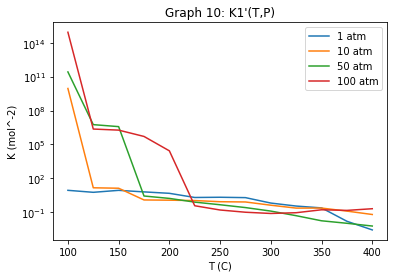

In [17]:
K1 = (NCH3OH_1 * NH2O_1)/(NCO2_1 * NH2_1**3)
K10 = (NCH3OH_10 * NH2O_10)/(NCO2_10 * NH2_10**3)
K50 = (NCH3OH_50 * NH2O_50)/(NCO2_50 * NH2_50**3)
K100 = (NCH3OH_100 * NH2O_100)/(NCO2_100 * NH2_100**3)
plt.plot(T2_C,K1)
plt.plot(T2_C,K10)
plt.plot(T2_C,K50)
plt.plot(T2_C,K100)
plt.yscale("log")
plt.legend(["1 atm", "10 atm", "50 atm", "100 atm"])
plt.xlabel('T (C)')
plt.ylabel('K (mol^-2)')
plt.title('Graph 10: K1\'(T,P)')

Text(0.5, 1.0, "Graph 11: ln(K1'(T,P)) at 100C vs P")

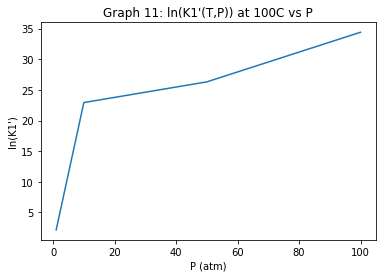

In [18]:
lnK1_y = np.log(np.array([K1[0],K10[0],K50[0],K100[0]]))
P_x = np.array([1,10,50,100])
plt.plot(P_x,lnK1_y)
plt.xlabel('P (atm)')
plt.ylabel('ln(K1\')')
plt.title('Graph 11: ln(K1\'(T,P)) at 100C vs P')